In [1]:
!bash /home/azureuser/cloudfiles/code/blobfuse/blobfuse_raadsinformatie.sh

In [3]:
import sys
sys.path.append("..")

# Select where to run notebook: "azure" or "local"
my_run = "azure"

# import my_secrets as sc
# import settings as st

if my_run == "azure":
    import config_azure as cf
elif my_run == "local":
    import config as cf


import os
if my_run == "azure":
    if not os.path.exists(cf.HUGGING_CACHE):
        os.mkdir(cf.HUGGING_CACHE)
    os.environ["TRANSFORMERS_CACHE"] = cf.HUGGING_CACHE

import pandas as pd

## Notebook overview

*Previous notebook: baseline*

*Next notebook: none, last notebook*

## Page distribution

In [4]:
txtfiles = pd.read_pickle(f"{cf.output_path}/txtfiles.pkl")
notcleaned = pd.read_pickle(f"{cf.output_path}/txtfiles_notcleaned.pkl")

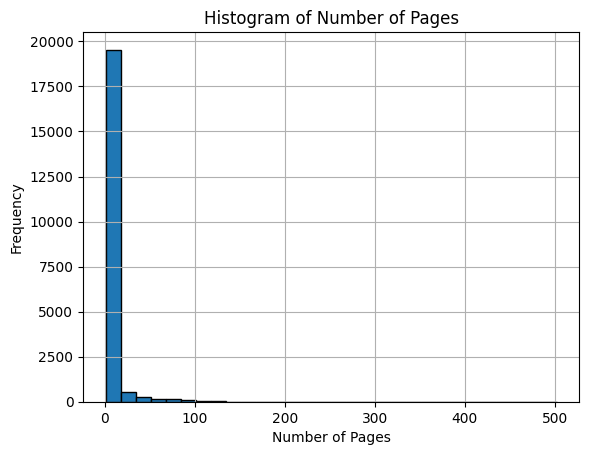

In [5]:
import matplotlib.pyplot as plt

# Assuming txtfiles is your DataFrame and num_pages is the column you want to plot
plt.hist(txtfiles['num_pages'], bins=30, edgecolor='black')  # Adjust number of bins as needed
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pages')
plt.grid(True)
plt.show()


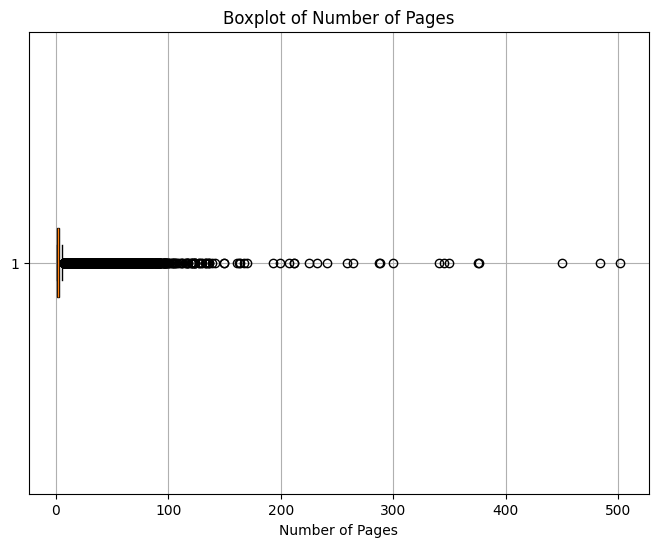

In [6]:
import matplotlib.pyplot as plt

# Assuming txtfiles is your DataFrame and num_pages is the column you want to plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(txtfiles['num_pages'], vert=False, patch_artist=True)
plt.xlabel('Number of Pages')
plt.title('Boxplot of Number of Pages')
plt.grid(True)
plt.show()


In [7]:
cleaned = notcleaned.loc[notcleaned['id'].isin(txtfiles['id'])]

notcleaned_removed = notcleaned.loc[~notcleaned['label'].isin(['Adviesaanvraag', 'Amendement', 'Begroting'])]

display(notcleaned_removed['token_count'].describe())
display(notcleaned_removed['num_pages'].describe())
display(cleaned['token_count'].describe())
display(cleaned['num_pages'].describe())


count     26739.000000
mean       2019.839298
std        6980.052643
min           3.000000
25%         291.000000
50%         516.000000
75%        1160.000000
max      275597.000000
Name: token_count, dtype: float64

count    26737.000000
mean         5.420541
std         14.832611
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max        502.000000
Name: num_pages, dtype: float64

count     20818.000000
mean       2120.675617
std        7545.434859
min          20.000000
25%         271.250000
50%         455.000000
75%        1106.000000
max      275597.000000
Name: token_count, dtype: float64

count    20818.000000
mean         5.604381
std         16.089036
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        502.000000
Name: num_pages, dtype: float64

### Amount of docs exceeding limit

In [9]:
grouped_description = txtfiles.groupby('label')['count_LlamaTokens'].describe()
display(grouped_description)

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Actualiteit,800.0,1629.756250,8662.494032,165.0,512.50,732.5,1305.00,234499.0
Agenda,2544.0,1999.538522,10121.983150,74.0,516.75,1053.5,1918.00,314952.0
Besluit,625.0,2182.633600,3918.344740,227.0,387.00,979.0,2619.00,56288.0
Brief,1056.0,3137.704545,3082.126520,312.0,1363.00,2297.0,3841.75,56355.0
Factsheet,214.0,12337.341121,26342.297934,261.0,2327.25,5927.0,11867.50,230752.0
Motie,7639.0,901.439586,1680.205979,239.0,514.00,634.0,835.00,75020.0
Onderzoeksrapport,1174.0,31677.848382,40610.644482,683.0,12640.00,22654.0,38087.50,618067.0
Raadsadres,1621.0,2099.353486,3076.278696,108.0,737.00,1261.0,2256.00,35101.0
Raadsnotulen,231.0,68092.839827,22624.293007,4606.0,54819.50,71582.0,84301.50,109188.0


In [11]:
txtfiles['count_LlamaTokens'].describe()

count     20818.000000
mean       4340.207897
std       15456.312555
min          74.000000
25%         612.000000
50%        1031.000000
75%        2378.000000
max      618067.000000
Name: count_LlamaTokens, dtype: float64

Bad pipe message: %s [b'F\x99rV\x84\x91\xa8\x95\xebN{d{\x84U\x94\x96\xd6 \xea\x04\x98\x98\xafz\x1b\x81B\xe1\xddk\xa3\x97\xdbi\x8a\x0e\x00\x0c\x1a\xed+\xc4\x9d\x98\xddn\xa8\x98y\x98\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00', b'\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00']
Bad pipe message: %s [b'\x1d\x00\x17\x00\x1e\x00\x19\x00\x18']
Bad pipe message: %s [b"\x9c\xb6\xfd\xb9'\xd5\xed>\xfe\xc2\x11\xc1V\xd3H\xb2@\x0b \xf9\xa6\x0e\x1e\x8b9\x16\xc9\xfe\xb4\xf9&\x1f\x98M\xb92h<|\xe9\x1c\xda\xa4\xecA\xda\xb9\x92\x10\x04z\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08"]
Bad pipe message: %s [b'\x08\n\x08\x0b\x08\x04\x08', b'\x06\x04\x01\x05']
Bad pipe message: %s [b'']
Bad pipe message: %s [b

In [8]:
print(len(txtfiles.loc[txtfiles['count_LlamaTokens']>4096])/len(txtfiles))

0.1343548851955039


## Fine-tuning Experiments
- Accuracy scores for each model, and epoch
- Runtime per doc for each model, and epoch

In [3]:
def average_runtime_per_doc(runtime):
    return round(runtime/1100)

In [16]:

# incontext learing -> training on 0 epochs is the same as incontext learning
epoch0_g = pd.read_pickle(f"{cf.output_path}/predictionsFinal/in_context/GEITje/overview.pkl")
epoch0_g = epoch0_g.loc[epoch0_g['run_id']=='IC_GEITje-7B-chat-v2zeroshot_prompt_geitjeLlamaTokens200_0traintest_numEx0']
epoch0_l = pd.read_pickle(f"{cf.output_path}/predictionsFinal/in_context/Llama/overview.pkl")
epoch0_l = epoch0_l.loc[epoch0_l['run_id']=='IC_Llama-2-7b-chat-hfzeroshot_prompt_mistral_llamaLlamaTokens200_0traintest_numEx0']
epoch0_m = pd.read_pickle(f"{cf.output_path}/predictionsFinal/in_context/Mistral/overview.pkl")
epoch0_m = epoch0_m.loc[epoch0_m['run_id']=='IC_Mistral-7B-Instruct-v0.2zeroshot_prompt_mistral_llamaLlamaTokens200_0traintest_numEx0']
epoch0 = pd.concat([epoch0_g, epoch0_l, epoch0_m])
epoch0['base_model'] = ['GEITje', 'Llama', 'Mistral']
epoch0['epoch'] = 0

#fine-tuning
epoch1 = pd.read_pickle(f"{cf.output_path}/predictionsFinal/finetuning/1epochs/overview.pkl")
epoch1['base_model'] = ['Mistral', 'GEITje', 'Llama']
epoch1['epoch'] = 1

epoch2 = pd.read_pickle(f"{cf.output_path}/predictionsFinal/finetuning/2epochs/overview.pkl")
epoch2 = epoch2.loc[epoch2['run_id']!= 'ORIGINALFT_AmsterdamDocClassificationMistral200T2Epochszeroshot_prompt_mistral_llamaLlamaTokens200_0traintest_numEx0']
epoch2['epoch'] = 2
epoch2['base_model'] = ['GEITje', 'Llama', 'Mistral']
# display(epoch2)

epoch3 = pd.read_pickle(f"{cf.output_path}/predictionsFinal/finetuning/3epochs/overview.pkl")
epoch3 = epoch3.loc[epoch3['run_id']!='ORIGINALFT_AmsterdamDocClassificationMistral200T3Epochszeroshot_prompt_mistral_llamaLlamaTokens200_0traintest_numEx0']
epoch3['base_model'] = ['Llama', 'GEITje', 'Mistral']
epoch3['epoch'] = 3
# display(epoch3)


overview = pd.concat([epoch0, epoch1, epoch2, epoch3])
overview['runtime_per_doc'] = overview['runtime'].apply(average_runtime_per_doc)
# display(overview)

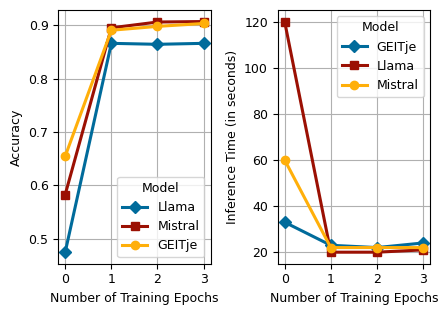

In [17]:
import matplotlib.pyplot as plt

# First plot
plt.figure(figsize=(4.5, 3.25))  # Adjust figsize as needed
colors = ['#006B9B', '#9B1003',  '#FFAF0A']

markers = ['D', 's', 'o']  # Square, Star, Diamond
marker_size = 14
line_width = 2.2


plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, position 1
df = overview.copy()
# for idx, model in enumerate(df['base_model'].unique()):
for idx, model in enumerate(['Llama', 'Mistral', 'GEITje']):

    model_df = df[df['base_model'] == model]
    plt.plot(model_df['epoch'], model_df['accuracy'], marker=markers[idx], label=model, color=colors[idx % len(colors)], linewidth=line_width)

fs = 9
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks([0,1, 2, 3],fontsize=fs)
plt.xlabel('Number of Training Epochs', fontsize=fs)
plt.ylabel('Accuracy', fontsize=fs)
plt.legend(title='Model', fontsize=fs, title_fontsize=fs)
plt.grid(True)

# Second plot
plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, position 2
df = overview.copy()
for idx, model in enumerate(df['base_model'].unique()):
    model_df = df[df['base_model'] == model]
    plt.plot(model_df['epoch'], model_df['runtime_per_doc'], marker=markers[idx], label=model, color=colors[idx % len(colors)], linewidth=line_width)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks([0,1, 2, 3],fontsize=fs)
plt.xlabel('Number of Training Epochs', fontsize=fs)
plt.ylabel('Inference Time (in seconds)', fontsize=fs)
plt.legend(title='Model', fontsize=fs, title_fontsize=fs)
plt.grid(True)

plt.tight_layout()  # Ensures plots are nicely spaced
plt.show()
